# Import Library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#load dataset

In [3]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Menampilkan jumlah pasien pengidap penyakit jantung (0=Bukan, 1=pengidap)

In [4]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<ipython-input-6-b0a98f66ae3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=data, palette="bwr")


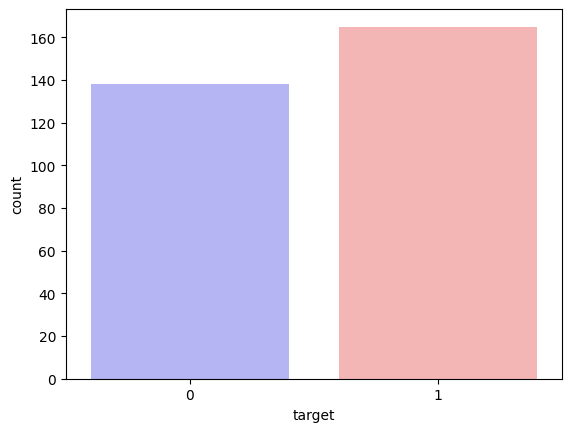

In [6]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

Menampilkan visualisasi dan persentase dari jumlah pasien pengidap penyakit jantung berdasarkan jenis klamin

<ipython-input-7-e6977c001d77>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=data, palette="mako_r")


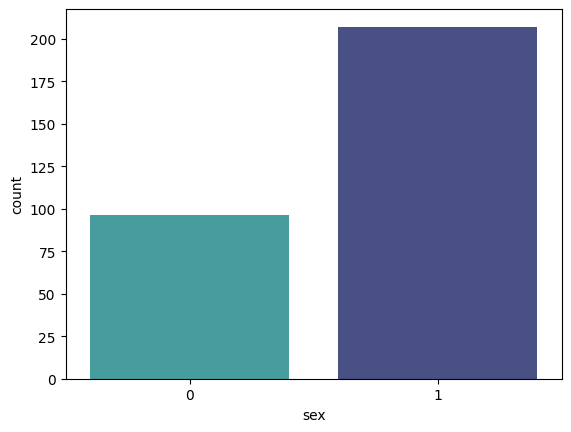

In [7]:
sns.countplot(x="sex", data=data, palette="mako_r")
plt.xlabel=("Sex (0 = female, 1=male)")
plt.show()

Menampilkan visualisasi data dari jumlah pasien pengidap dan bukan berdasarkan umur

TypeError: 'str' object is not callable

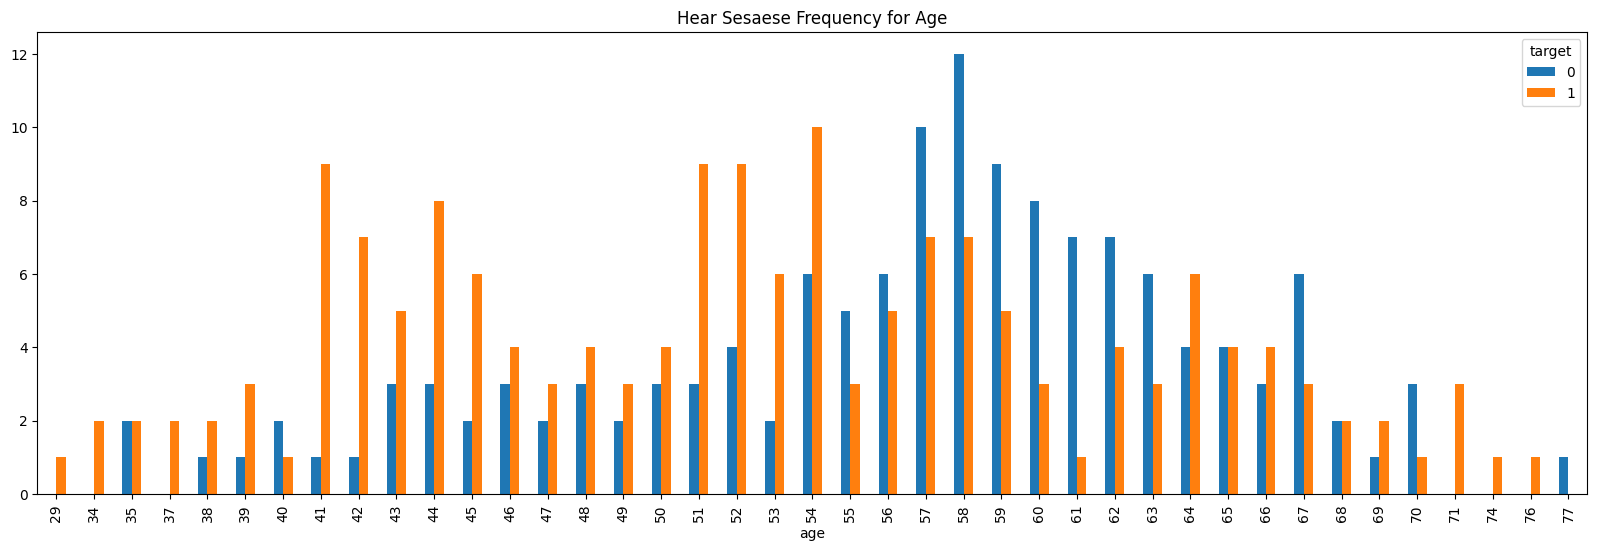

In [8]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20,6))
plt.title("Hear Sesaese Frequency for Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hearDiseaseAndAges.png')
plt.show()

Menampilkan visualisasi data dari jumlah pasien pengidap dan bukan berdasarkan jenis kelamin

TypeError: 'str' object is not callable

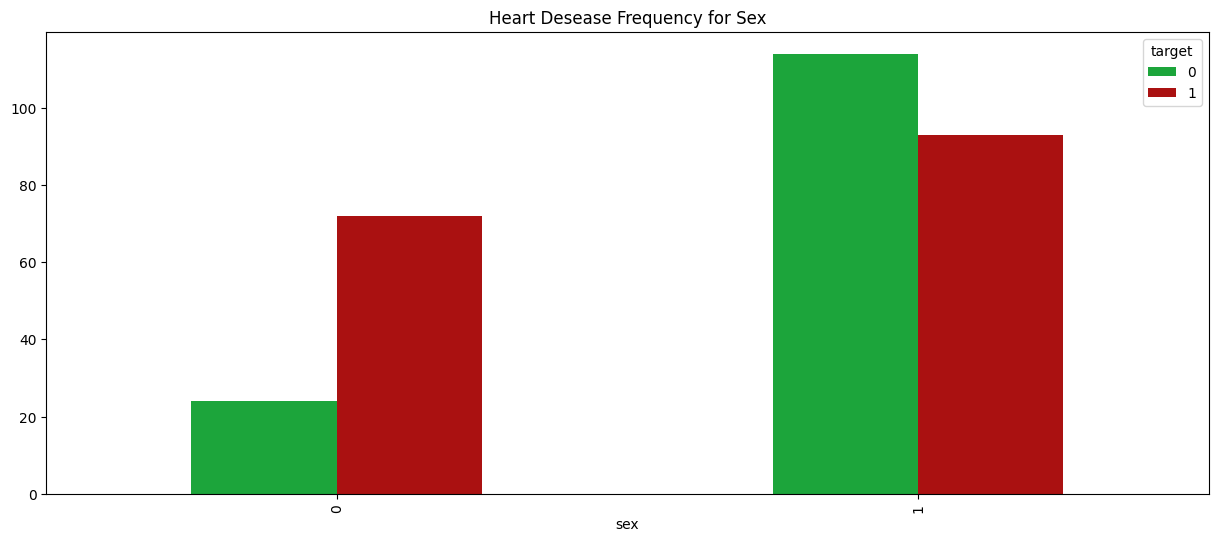

In [14]:
pd.crosstab(data.sex, data.target).plot(kind="bar", figsize=(15,6), color=['#1CA53B','#AA1111'])
plt.title("Heart Desease Frequency for Sex")
plt.xlabel("Sex (0 = female, 1=male)")
plt.xticks(rotation=0)
plt.legend(["Haven't Desease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

Menampilkan visualisasi data dari jumlah pasien pengidap dan bukan bedasarkan umur dan detak jantung

TypeError: 'str' object is not callable

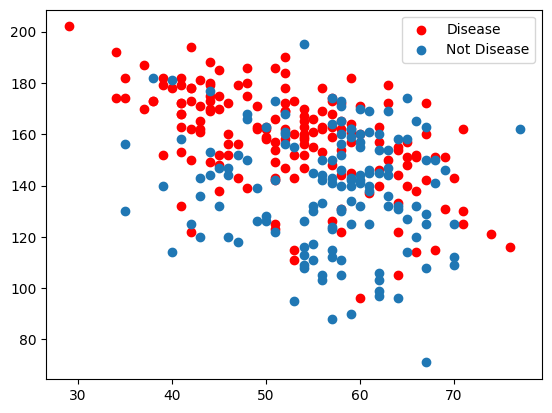

In [16]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease","Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Menampilkan visualisasi data dari jumlah pasien pengidap dan bukan berdasarkan gejala yang dialami

TypeError: 'str' object is not callable

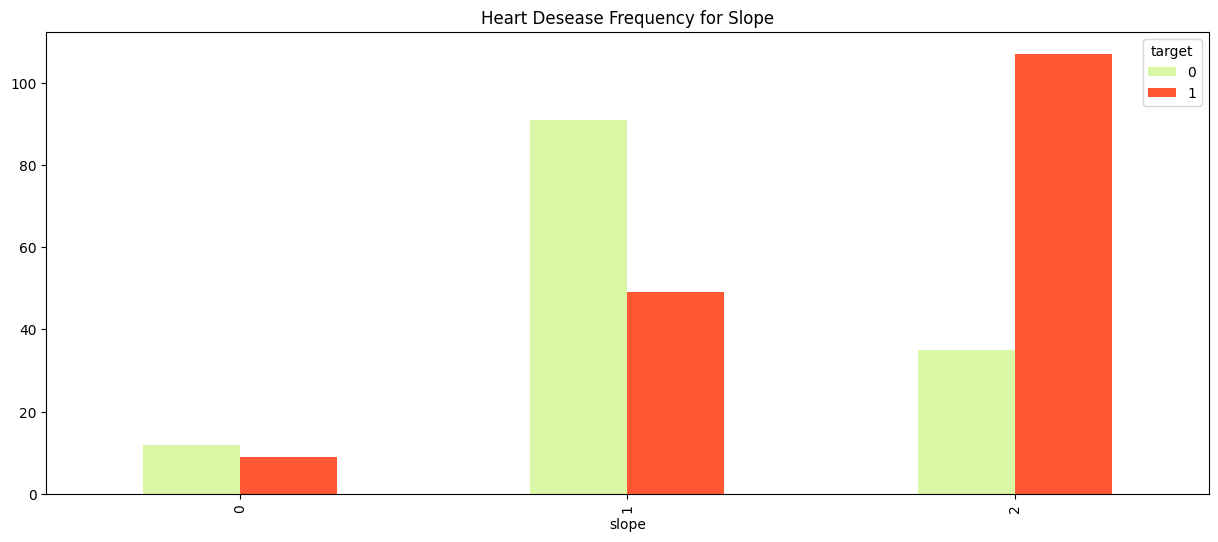

In [20]:
pd.crosstab(data.slope, data.target).plot(kind="bar", figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title("Heart Desease Frequency for Slope")
plt.xlabel("The slope of the peak exercise ST Segment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

TypeError: 'str' object is not callable

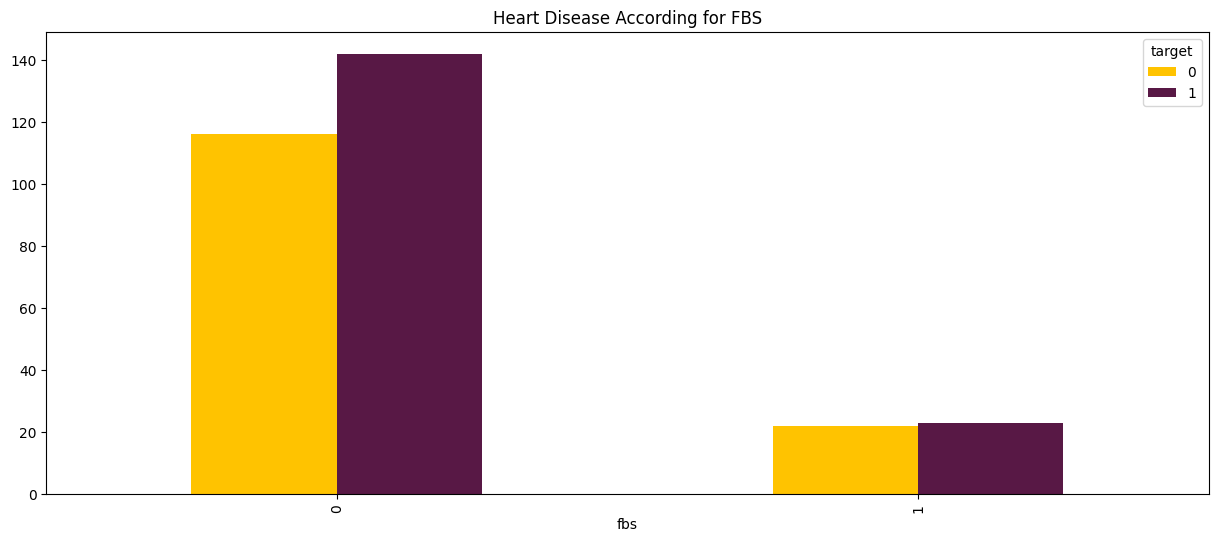

In [21]:
pd.crosstab(data.fbs, data.target).plot(kind="bar", figsize=(15,6),color=['#FFC300','#581845'])
plt.title("Heart Disease According for FBS")
plt.xlabel('FBS - (Fasting Blood Sugar >120 mg/dl)(1=true; 0=false)')
plt.xticks(rotation=0)
plt.legend(["haven't Disease","Have Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

TypeError: 'str' object is not callable

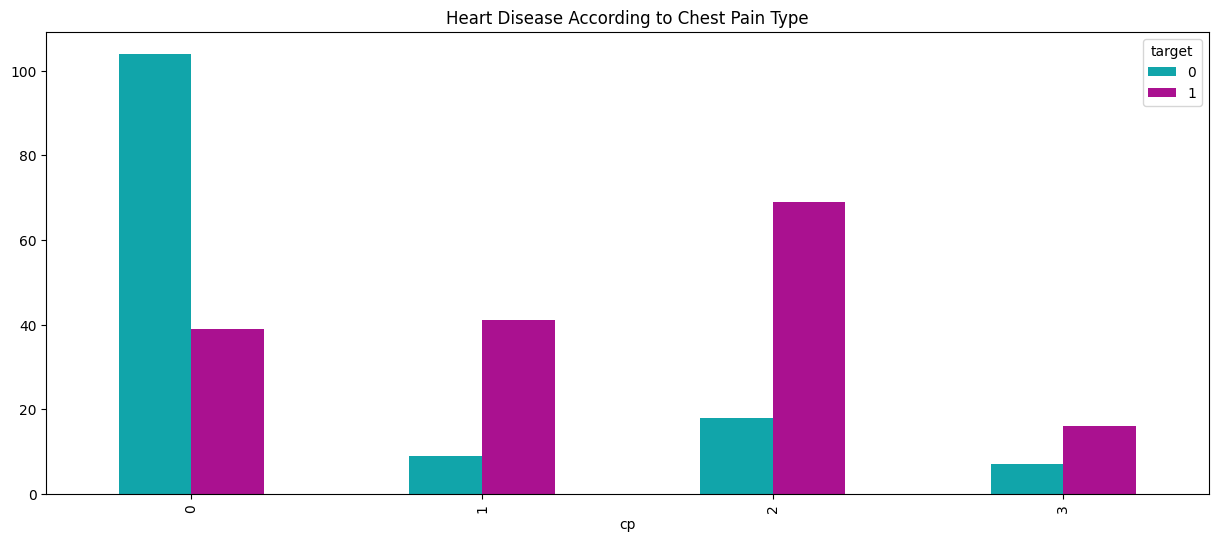

In [22]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title("Heart Disease According to Chest Pain Type")
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

In [25]:
a=pd.get_dummies(data['cp'], prefix="cp")
b=pd.get_dummies(data['thal'], prefix="thal")
c=pd.get_dummies(data['slope'], prefix="slope")

In [26]:
frames=[data, a,b,c]
data=pd.concat(frames, axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [27]:
data=data.drop(columns=['cp','thal','slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [37]:
y=data.target.values
x_data=data.drop(['target'],axis=1)

In [38]:
print(type(x_data))


<class 'pandas.core.frame.DataFrame'>


In [40]:
x=(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

# Split Dataset

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [42]:
#transform matrix
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [44]:
#Initialize
def Initialize(dimension):

  weight=np.full((dimension,1),0.01)
  bias=0.0
  return weight, bias

In [45]:
def sigmoid(z):

  y_head=1/(1+np.exp(-z))
  return y_head

#Melakukan cek menggunakan data trainda prediksi dengan data test menggunakan KNN

In [47]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2) #n_neighbors means k

In [48]:
knn.fit(x_train.T, y_train.T)

KNeighborsClassifier(n_neighbors=2)

In [50]:
prediction = knn.predict(x_test.T)
print("{} KNN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 KNN Score: 60.66%


#Menampilkan hasil score maksimal dari algoritma KNN pada klasifikasi data

TypeError: 'str' object is not callable

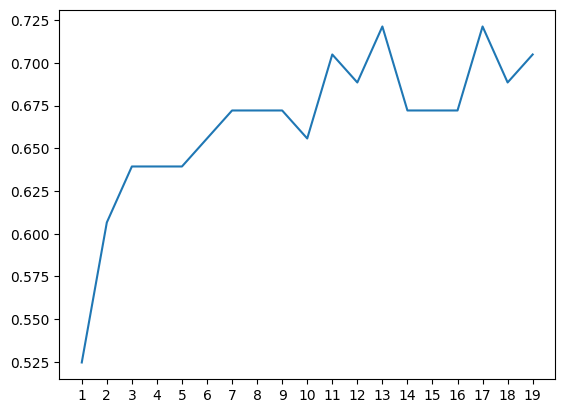

In [53]:
#tray to find best k Value
scoreList = []
for i in range(1,20):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train.T, y_train.T)
  scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("k value")
plt.ylabel("Score")
plt.show()

maxaccuracy=max(scoreList)*100
print("Maximum KNN score is {:.2f}%".format(maxaccuracy))